Baseline MAE: 0.21240125

2020.06.11 before review MAE: 0.178625

# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# SETUP

In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

import re
import ast   # to process features containing lists

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [63]:
pd.set_option('display.min_rows', 30)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [64]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [65]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# INITIATE DATA

In [66]:
DATA_DIR = './kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [68]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [70]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [71]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [72]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [73]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [75]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
39567,id_236,Paris,"['French', 'European', 'Contemporary', 'Vegeta...",237.0,$$$$,1085.0,[['1st Wedding Anniversary dinner... and how!'...,/Restaurant_Review-g187147-d4732316-Reviews-Le...,d4732316,1,4.5
5747,id_5747,London,"['Bar', 'Cafe', 'British', 'Vegetarian Friendl...",238.0,$,812.0,"[['Lovely', 'Perfect English breakfast!'], ['0...",/Restaurant_Review-g186338-d3236017-Reviews-Po...,d3236017,0,0.0
10928,id_3287,Rome,"['Italian', 'Mediterranean', 'Vegetarian Frien...",3288.0,$,44.0,"[['Great place for snack or coffee!', 'Excelle...",/Restaurant_Review-g187791-d9710052-Reviews-Cr...,d9710052,1,4.5
1296,id_1296,Krakow,"['European', 'Vegetarian Friendly', 'Gluten Fr...",210.0,$$ - $$$,110.0,"[['So friendly and good food', 'Good food, goo...",/Restaurant_Review-g274772-d5499133-Reviews-No...,d5499133,0,0.0
17634,id_6623,Paris,['French'],6624.0,$$ - $$$,71.0,"[['Nice neighborhood spot', 'Good terrace, fri...",/Restaurant_Review-g187147-d6899324-Reviews-La...,d6899324,1,3.5


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data

In [76]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

## Processing Ranking

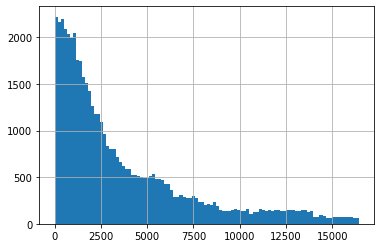

In [77]:
data['Ranking'].hist(bins=100)

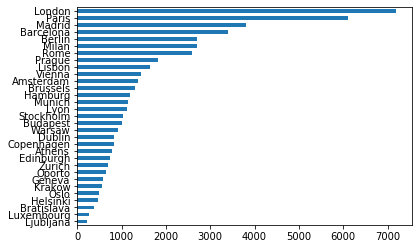

In [78]:
data['City'].value_counts(ascending=True).plot(kind='barh')

In [79]:
data[data.City == 'London'].Ranking.value_counts()

11783.0    1
13653.0    1
15914.0    1
3163.0     1
7834.0     1
4367.0     1
9725.0     1
4539.0     1
7321.0     1
9790.0     1
12527.0    1
9045.0     1
1197.0     1
6818.0     1
4988.0     1
          ..
16287.0    1
15275.0    1
8654.0     1
2470.0     1
2095.0     1
9480.0     1
8185.0     1
8888.0     1
8692.0     1
11409.0    1
10824.0    1
1485.0     1
5573.0     1
12745.0    1
640.0      1
Name: Ranking, Length: 7193, dtype: int64

In [80]:
data.corr()

,Ranking,Number of Reviews,sample,Rating
Ranking,1.000000,-0.223775,0.006271,-0.109897
Number of Reviews,-0.223775,1.000000,0.002412,0.011472
sample,0.006271,0.002412,1.000000,0.936543
Rating,-0.109897,0.011472,0.936543,1.000000


Ranking values are unique within a city.

There is no strong correlation between Ranking and Rating.

Random Forest does not require feature standartisation. Do nothing.

## 1. Processing Number of Reviews NANs

Number of Reviews is NaN feature:

- with: MAE: 18.2

- without: MAE: 0.18125

FAIL

In [81]:
# data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

> Далее попробовать заполнение средним или средним по городу и тд...

In [82]:
data['Number of Reviews'].value_counts(dropna=False)

NaN       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
7.0       1126
8.0       1026
9.0        966
10.0       854
11.0       807
12.0       742
13.0       691
14.0       639
15.0       593
          ... 
2272.0       1
1838.0       1
1974.0       1
1347.0       1
947.0        1
3034.0       1
3160.0       1
993.0        1
1102.0       1
982.0        1
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: Number of Reviews, Length: 1574, dtype: int64

In [83]:
data['Number of Reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

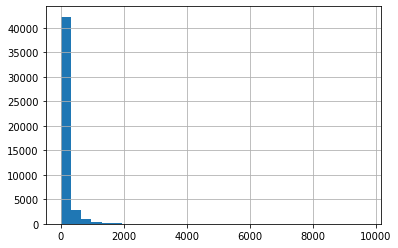

In [84]:
data['Number of Reviews'].hist(bins=30)

In [85]:
data[data['sample'] == 1][['Number of Reviews', 'Rating']].fillna(0).corr()

,Number of Reviews,Rating
Number of Reviews,1.000000,0.026924
Rating,0.026924,1.000000


>Consider filling NAs somehow differently. I.e. city average, cuisine average, etc.

In [86]:
# Далее заполняем пропуски 0
data['Number of Reviews'].fillna(0, inplace=True)

## Processing City

### Trying "Is in Capital" feature
*Borrowed from Bendith*

Before: MAE: 0.18125

After: MAE: 0.180875

KEEP IT

In [87]:
city_list = data['City'].unique()

# creating list of capital cities
Capitals = ['Paris', 'Stockholm', 'London', 'Berlin', 'Bratislava', 'Vienna', 'Rome', 'Madrid',
            'Dublin', 'Brussels', 'Warsaw', 'Budapest', 'Copenhagen','Amsterdam', 'Lisbon', 'Prague',
            'Oslo','Helsinki', 'Edinburgh', 'Ljubljana', 'Athens', 'Luxembourg']

In [88]:
def new_city(row):
    '''Function returns 1 if restaurant located in capital city '''
    if row['City'] in Capitals:
        return 1
    else:
        return 0


# Creating new Series, values are filling with function new_city
is_in_capital = data.apply(lambda row: new_city(row), axis=1)
# Adding new column if city is capital
data['is_in_capital'] = is_in_capital

### Trying Population feature
*Borrowed from Bendith*

Before: MAE: 0.180875

After: MAE: 0.178625

KEEP IT

In [89]:
# population, mln people
population = {'Paris': 2.141, 'Stockholm': 0.973, 'London': 8.9, 'Berlin': 3.748, 
              'Munich': 1.456, 'Oporto': 0.214,'Milan': 1.352,'Bratislava': 0.424, 
              'Vienna': 1.889, 'Rome': 2.873, 'Barcelona': 5.515, 'Madrid': 6.55,
              'Dublin': 1.361,'Brussels': 0.174, 'Zurich': 0.403, 'Warsaw': 1.708, 
              'Budapest': 1.75, 'Copenhagen': 0.602,'Amsterdam': 0.822,'Lyon': 0.513, 
              'Hamburg': 1.822,'Lisbon': 0.505, 'Prague': 1.319, 'Oslo': 0.673,
              'Helsinki': 0.632,'Edinburgh': 0.482,'Geneva': 0.495, 'Ljubljana': 0.28,
              'Athens': 0.664, 'Luxembourg': 0.602,'Krakow': 0.769}

# Adding new column - city population
data['Population'] = data['City'].map(population)

### City is a category feature, converting to dummies

dummy_na=True: MAE: 0.178625

dummy_na=False: MAE: 0.17925

In [90]:
data = pd.get_dummies(data, columns=['City'], dummy_na=True)
data.columns

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'is_in_capital', 'Population', 'City_Amsterdam', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Bratislava', 'City_Brussels',
       'City_Budapest', 'City_Copenhagen', 'City_Dublin', 'City_Edinburgh',
       'City_Geneva', 'City_Hamburg', 'City_Helsinki', 'City_Krakow',
       'City_Lisbon', 'City_Ljubljana', 'City_London', 'City_Luxembourg',
       'City_Lyon', 'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto',
       'City_Oslo', 'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich', 'City_nan'],
      dtype='object')

## Processing Price Range

In [91]:
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

### Adding Price Range isna feature

Before: MAE: 0.182

After: MAE: 0.181875

KEEP IT

### Enumerating Price Range

In [92]:
# replacing Price Range values:
price_dict = {'$': 1, 
              '$$ - $$$': 2, 
              '$$$$': 3
             }
data['Price Range'] = data['Price Range'].map(price_dict)
data['Price Range'].fillna(0, inplace=True)
# data['Price Range'].value_counts(dropna=False)
# data.sample(3)

May try dummies instead of enumerating Price Range

## Splitting Cuisine Style into dummies

In [93]:
data['Cuisine Style'][:3]

0                                       ['Bar', 'Pub']
1    ['European', 'Scandinavian', 'Gluten Free Opti...
2                              ['Vegetarian Friendly']
Name: Cuisine Style, dtype: object

In [94]:
# let's make cuisine list
def make_cuisine_list(cuisine_list):
    cuisine_list = cuisine_list.dropna()
    cuisine_list = ''.join(list(cuisine_list.apply(str))).replace('][', ', ')
    cuisine_list = set(cuisine_list.
        replace('[', '').
        replace(']', '').
        replace("'", "").split(', '))
    return cuisine_list

cuisine_list = make_cuisine_list(data['Cuisine Style'])

Converting Cuisine Style string into list type

In [95]:
data['Cuisine Style'].fillna('', inplace=True)
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: '' if x=='' else ast.literal_eval(x))

In [96]:
data['Cuisine Style'][:5]

0                                           [Bar, Pub]
1    [European, Scandinavian, Gluten Free Options, ...
2                                [Vegetarian Friendly]
3    [Italian, Mediterranean, European, Vegetarian ...
4    [Italian, Mediterranean, European, Seafood, Ve...
Name: Cuisine Style, dtype: object

Let's add cuisines count feature

nan=0 MAE: 0.178625

nan=1 MAE: 0.1800625

FAILURE

In [97]:
data['cuisine_count'] = data['Cuisine Style'].apply(len)

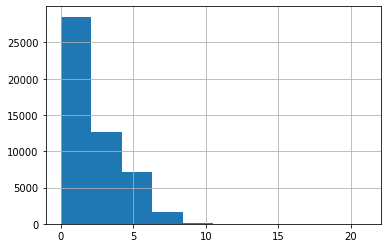

In [98]:
data.cuisine_count.hist()

Making Cuisine Style dummies:

In [99]:
cuisine_dummies = pd.get_dummies(data['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)
cuisine_dummies.drop(columns='', inplace=True)
# # is it the same?
# cuisine_dummies1 = pd.get_dummies(data['Cuisine Style'].apply(pd.Series).stack())

In [100]:
# # does the same but much slower
# for cuisine in cuisine_list:
#     data[cuisine] = 0
# #     print('Processing:', cuisine)    
#     mask = [cuisine in row[1] for _, row in data.iterrows()]    
#     data.loc[mask, cuisine] = 1

In [101]:
# # checking whether cuisine dummies filled correctly
# for cuisine in cuisine_list:
#     n_dummies = cuisine_dummies.loc[:, cuisine].sum()
#     mask = [cuisine in row[1] for _, row in data.iterrows()]    
#     in_data = len(data.loc[mask, 'Cuisine Style'])
#     print(f'{cuisine}: in dummies: {n_dummies}, in data: {in_data}, difference: {abs(n_dummies - in_data)}')

In [102]:
data = pd.concat([data, cuisine_dummies], axis=1, sort=False)

## Review Dates Processing

>try days of week, season
>
>how old is the last review, i.e. max_date - date

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [103]:
data.columns.to_list()

['Restaurant_id',
 'Cuisine Style',
 'Ranking',
 'Price Range',
 'Number of Reviews',
 'Reviews',
 'URL_TA',
 'ID_TA',
 'sample',
 'Rating',
 'is_in_capital',
 'Population',
 'City_Amsterdam',
 'City_Athens',
 'City_Barcelona',
 'City_Berlin',
 'City_Bratislava',
 'City_Brussels',
 'City_Budapest',
 'City_Copenhagen',
 'City_Dublin',
 'City_Edinburgh',
 'City_Geneva',
 'City_Hamburg',
 'City_Helsinki',
 'City_Krakow',
 'City_Lisbon',
 'City_Ljubljana',
 'City_London',
 'City_Luxembourg',
 'City_Lyon',
 'City_Madrid',
 'City_Milan',
 'City_Munich',
 'City_Oporto',
 'City_Oslo',
 'City_Paris',
 'City_Prague',
 'City_Rome',
 'City_Stockholm',
 'City_Vienna',
 'City_Warsaw',
 'City_Zurich',
 'City_nan',
 'cuisine_count',
 'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun & 

In [104]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','Cuisine Style', 'ID_TA', 'URL_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#     df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [105]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,is_in_capital,Population,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,cuisine_count,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Azerbaijani,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Burmese,Cafe,Cajun & Creole,Cambodian,Canadian,Caribbean,Caucasian,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ecuadorean,Egyptian,Ethiopian,European,Fast Food,Filipino,French,Fujian,Fusion,Gastropub,Georgian,German,Gluten Free Options,Greek,Grill,Halal,Hawaiian,Healthy,Hungarian,Indian,Indonesian,International,Irish,Israeli,Italian,Jamaican,Japanese,Korean,Kosher,Latin,Latvian,Lebanese,Malaysian,Mediterranean,Mexican,Middle Eastern,Minority Chinese,Mongolian,Moroccan,Native American,Nepali,New Zealand,Norwegian,Pakistani,Persian,Peruvian,Pizza,Polish,Polynesian,Portuguese,Pub,Romanian,Russian,Salvadoran,Scandinavian,Scottish,Seafood,Singaporean,Slovenian,Soups,South American,Southwestern,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
32768,2690.0,1.0,72.0,1,4.0,0,1.352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10337,1230.0,2.0,78.0,1,4.0,1,6.550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
10301,1273.0,3.0,554.0,1,4.0,0,5.515,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
44913,5653.0,0.0,3.0,1,4.0,1,6.550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31688,3450.0,2.0,0.0,1,5.0,1,3.748,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41379,6060.0,2.0,154.0,1,4.0,1,8.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
47044,421.0,2.0,139.0,1,4.0,1,1.361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [106]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 165 entries, Ranking to Yunnan
dtypes: float64(5), int64(3), uint8(157)
memory usage: 10.5 MB


In [107]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [108]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [109]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape, y_test.shape

((10000, 164), (40000, 164), (40000, 163), (32000, 163), (8000, 163), (8000,))

# Model 
Сам ML

In [110]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [111]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [112]:
X_train.sample(5)

,Ranking,Price Range,Number of Reviews,is_in_capital,Population,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,cuisine_count,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Azerbaijani,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Burmese,Cafe,Cajun & Creole,Cambodian,Canadian,Caribbean,Caucasian,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ecuadorean,Egyptian,Ethiopian,European,Fast Food,Filipino,French,Fujian,Fusion,Gastropub,Georgian,German,Gluten Free Options,Greek,Grill,Halal,Hawaiian,Healthy,Hungarian,Indian,Indonesian,International,Irish,Israeli,Italian,Jamaican,Japanese,Korean,Kosher,Latin,Latvian,Lebanese,Malaysian,Mediterranean,Mexican,Middle Eastern,Minority Chinese,Mongolian,Moroccan,Native American,Nepali,New Zealand,Norwegian,Pakistani,Persian,Peruvian,Pizza,Polish,Polynesian,Portuguese,Pub,Romanian,Russian,Salvadoran,Scandinavian,Scottish,Seafood,Singaporean,Slovenian,Soups,South American,Southwestern,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
39221,2688.0,1.0,0.0,1,0.174,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
48617,4225.0,0.0,100.0,1,2.141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21063,543.0,2.0,1309.0,0,1.352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
22323,1275.0,0.0,22.0,0,1.456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12500,8038.0,2.0,25.0,1,8.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
X_train.columns.to_list()

['Ranking',
 'Price Range',
 'Number of Reviews',
 'is_in_capital',
 'Population',
 'City_Amsterdam',
 'City_Athens',
 'City_Barcelona',
 'City_Berlin',
 'City_Bratislava',
 'City_Brussels',
 'City_Budapest',
 'City_Copenhagen',
 'City_Dublin',
 'City_Edinburgh',
 'City_Geneva',
 'City_Hamburg',
 'City_Helsinki',
 'City_Krakow',
 'City_Lisbon',
 'City_Ljubljana',
 'City_London',
 'City_Luxembourg',
 'City_Lyon',
 'City_Madrid',
 'City_Milan',
 'City_Munich',
 'City_Oporto',
 'City_Oslo',
 'City_Paris',
 'City_Prague',
 'City_Rome',
 'City_Stockholm',
 'City_Vienna',
 'City_Warsaw',
 'City_Zurich',
 'City_nan',
 'cuisine_count',
 'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun & Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central American',
 'Cent

In [114]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.8s finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [115]:
def round_ranking(arr, precision):
    return np.round(arr / precision) * precision
    
y_pred = round_ranking(y_pred, 0.5)

In [116]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.178625


# Submission
Если все устраевает - готовим Submission на кагл

In [117]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,is_in_capital,Population,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,cuisine_count,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Azerbaijani,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Burmese,Cafe,Cajun & Creole,Cambodian,Canadian,Caribbean,Caucasian,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ecuadorean,Egyptian,Ethiopian,European,Fast Food,Filipino,French,Fujian,Fusion,Gastropub,Georgian,German,Gluten Free Options,Greek,Grill,Halal,Hawaiian,Healthy,Hungarian,Indian,Indonesian,International,Irish,Israeli,Italian,Jamaican,Japanese,Korean,Kosher,Latin,Latvian,Lebanese,Malaysian,Mediterranean,Mexican,Middle Eastern,Minority Chinese,Mongolian,Moroccan,Native American,Nepali,New Zealand,Norwegian,Pakistani,Persian,Peruvian,Pizza,Polish,Polynesian,Portuguese,Pub,Romanian,Russian,Salvadoran,Scandinavian,Scottish,Seafood,Singaporean,Slovenian,Soups,South American,Southwestern,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
8633,285.0,2.0,243.0,0.0,0,0.513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
6422,2979.0,1.0,84.0,0.0,1,2.873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7179,977.0,0.0,7.0,0.0,1,0.632,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3553,2344.0,2.0,175.0,0.0,0,1.352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1545,1235.0,0.0,0.0,0.0,1,1.361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1145,12619.0,0.0,0.0,0.0,1,8.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2645,1964.0,2.0,190.0,0.0,1,2.141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [118]:
test_data = test_data.drop(['Rating'], axis=1)

In [119]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
5,id_5,4.5
6,id_6,4.5
7,id_7,2.0
8,id_8,2.0
9,id_9,3.5


In [120]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [121]:
predict_submission

array([3.005, 4.235, 4.56 , ..., 3.01 , 4.48 , 4.255])

In [122]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.005
1,id_1,4.235
2,id_2,4.560
3,id_3,4.305
4,id_4,4.405
5,id_5,4.670
6,id_6,1.955
7,id_7,2.815
8,id_8,4.300
9,id_9,4.755


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!


# Stuff